In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<ipython-input-3-4c80d72c5145>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.density)


<Axes: xlabel='density', ylabel='Density'>

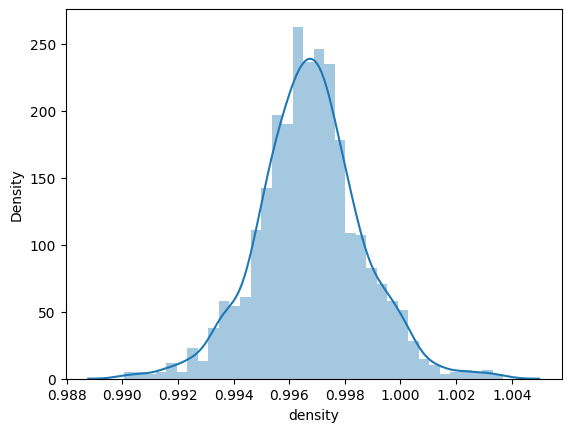

In [3]:
#UNivariate anaylsis
sns.distplot(df.density)

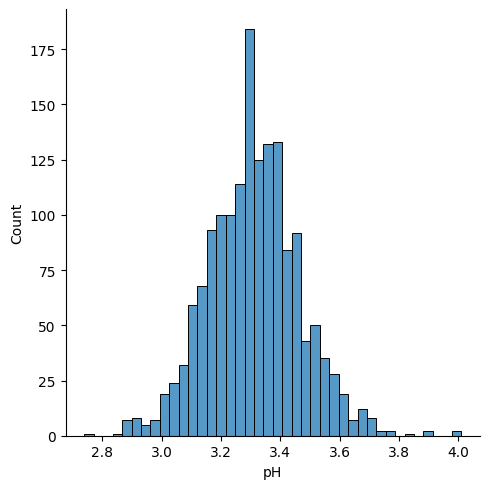

In [4]:
sns.displot(df.pH)

<Axes: xlabel='alcohol', ylabel='quality'>

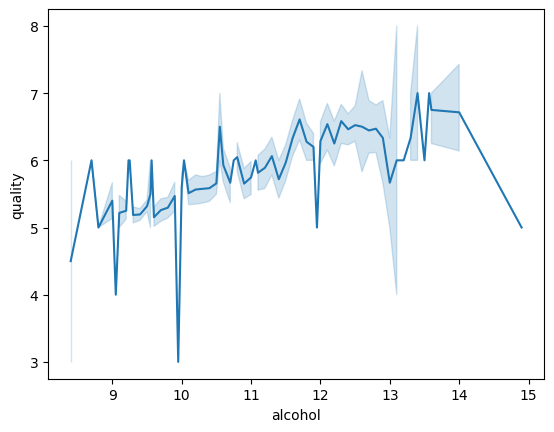

In [5]:
#Bivaraite anaylsis
sns.lineplot(x = df.alcohol,y=df.quality)

<Axes: xlabel='chlorides', ylabel='alcohol'>

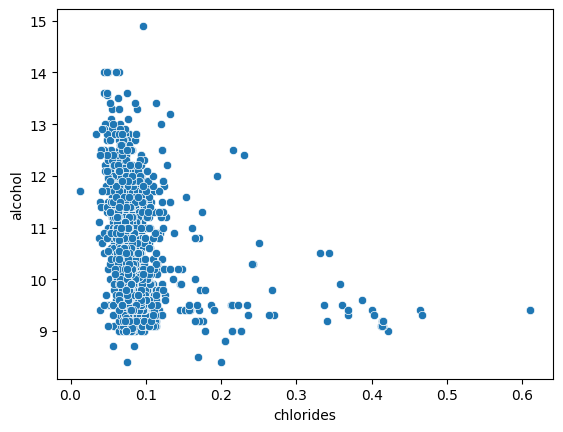

In [6]:
sns.scatterplot(x = df.chlorides,y=df.alcohol)

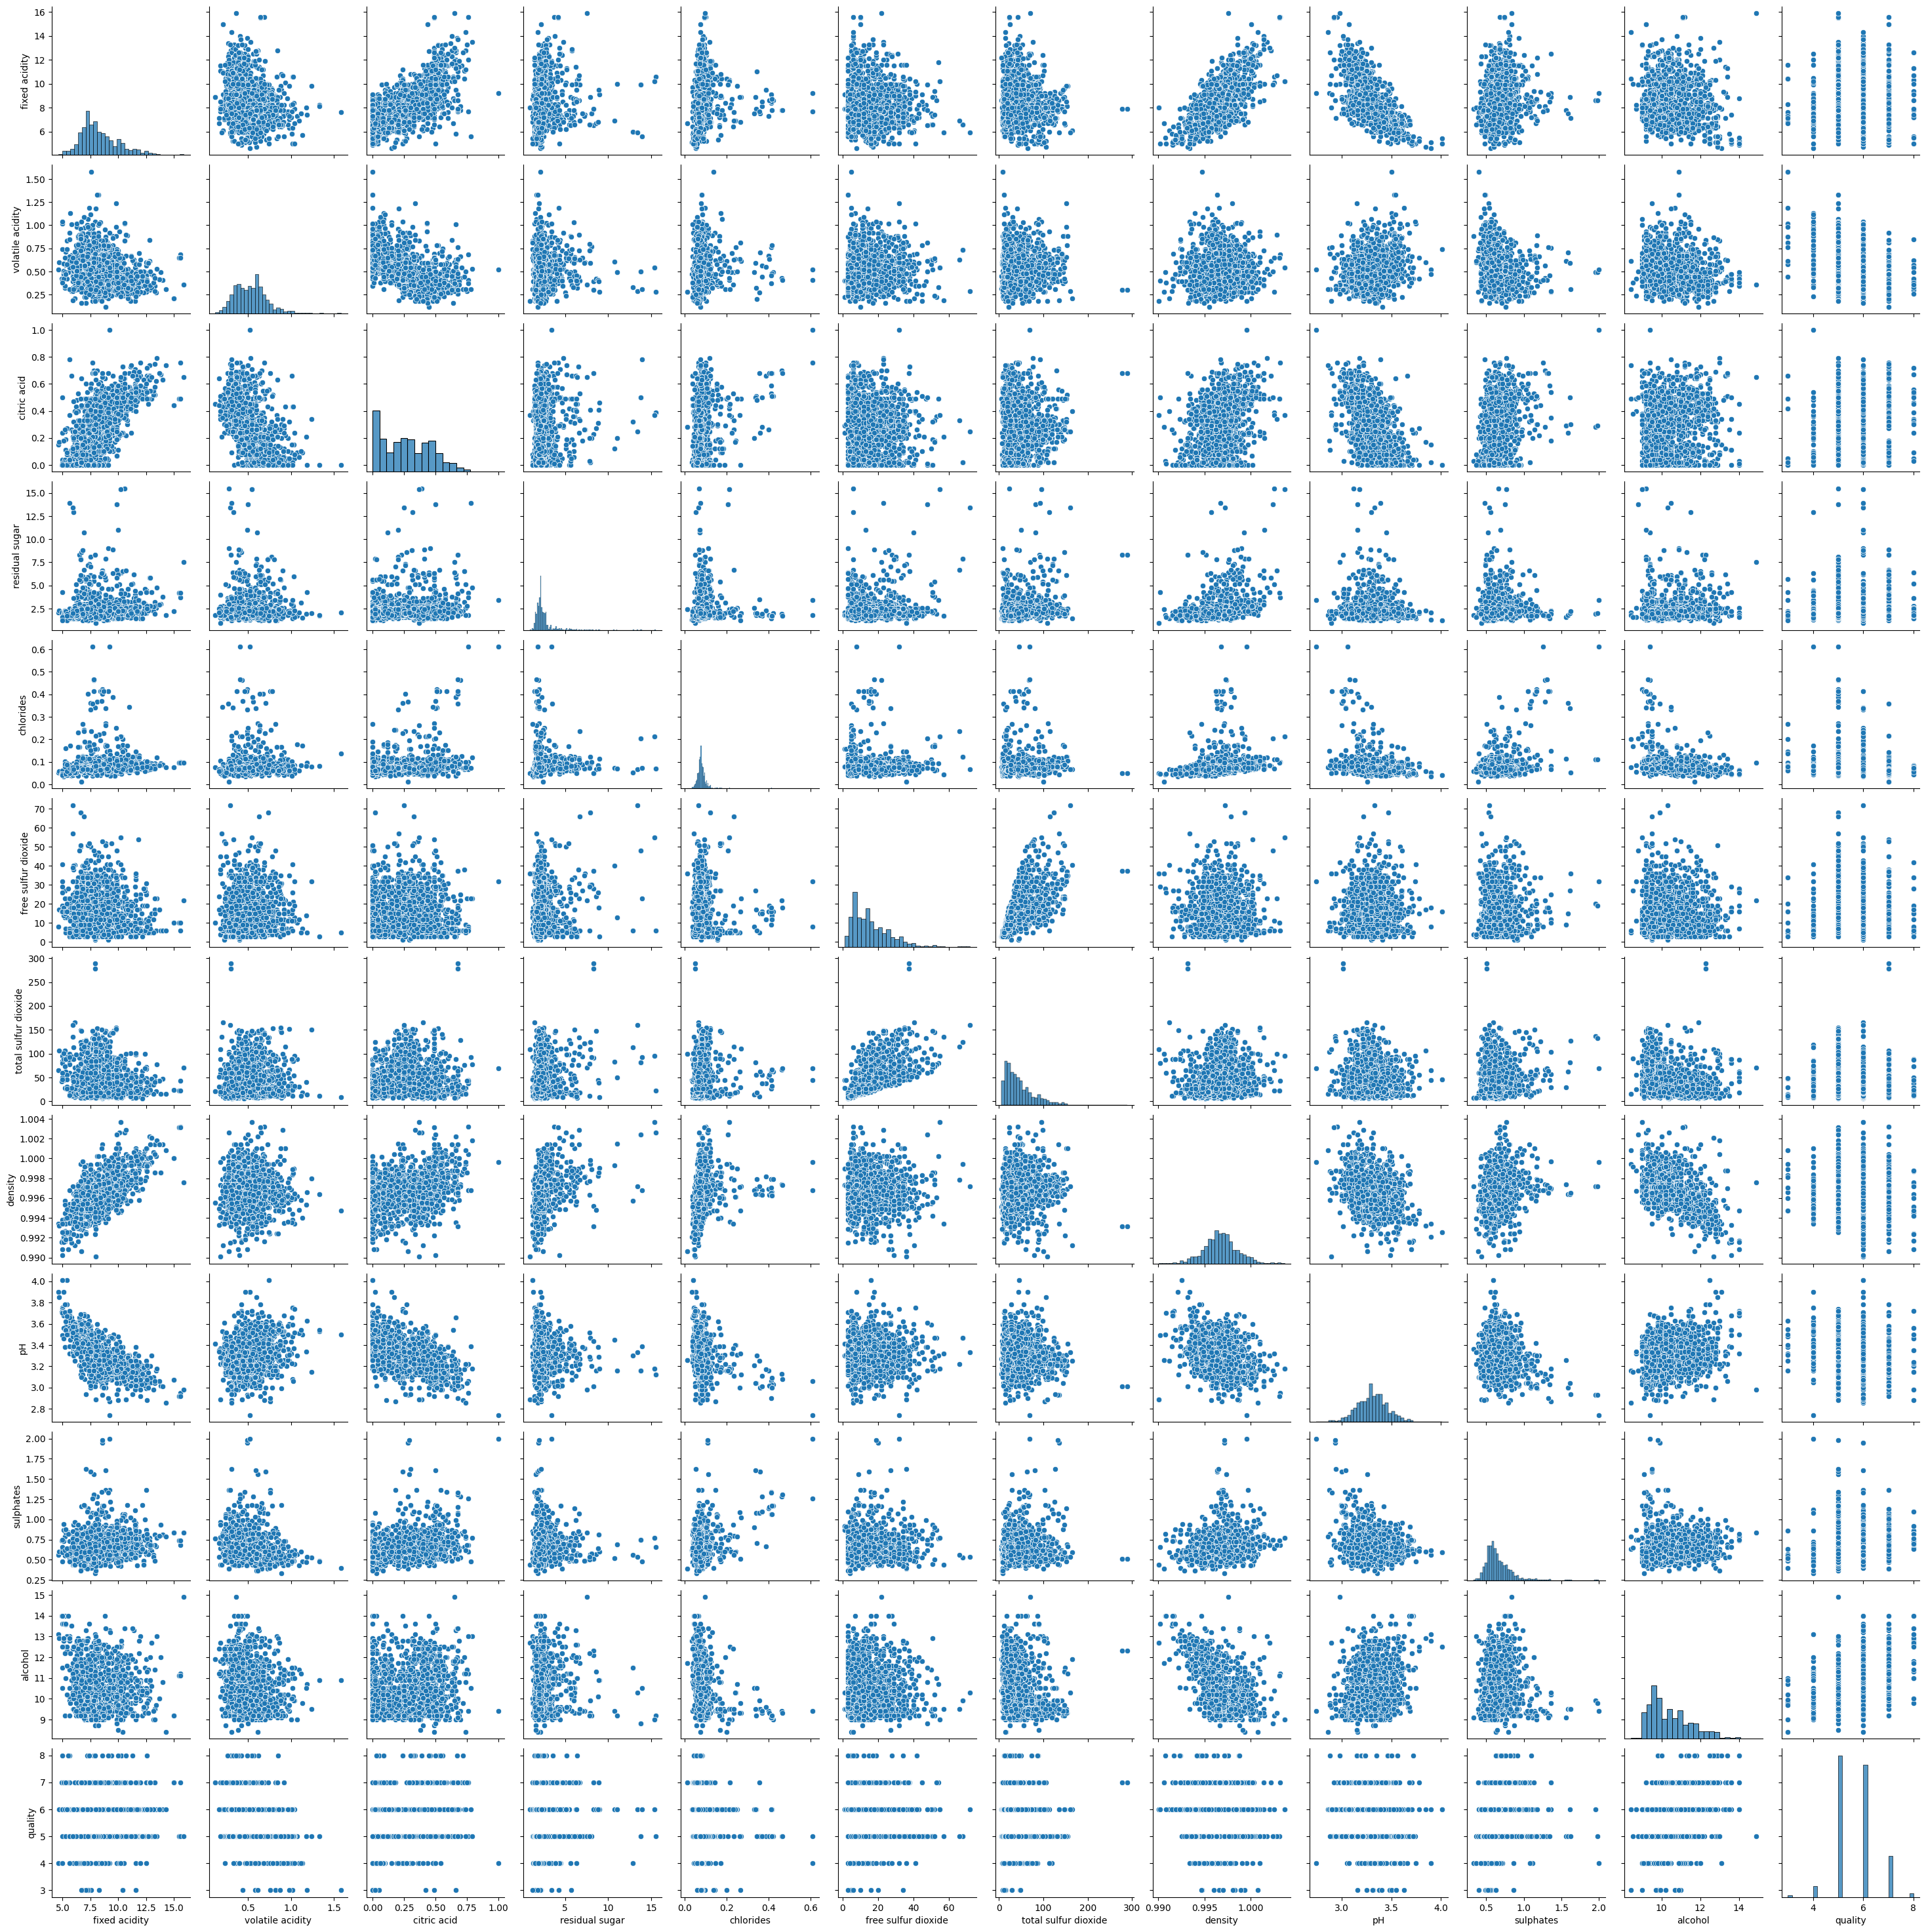

In [7]:
#Multivaraite anaylsis
sns.pairplot(df)

<Axes: >

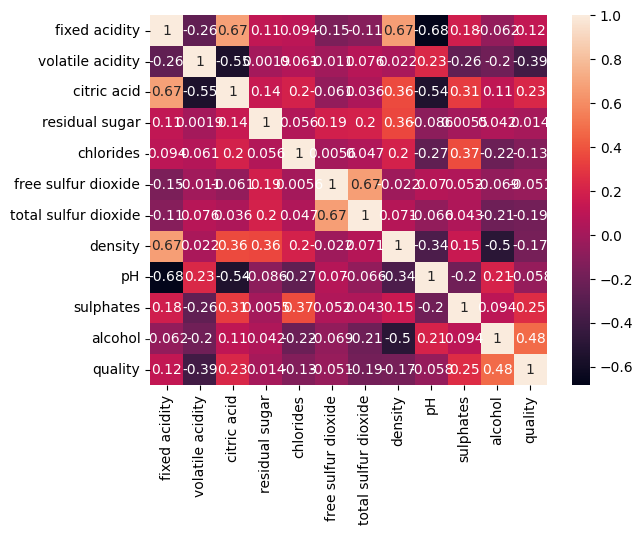

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
#Outlier detection
df.head


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

<Axes: >

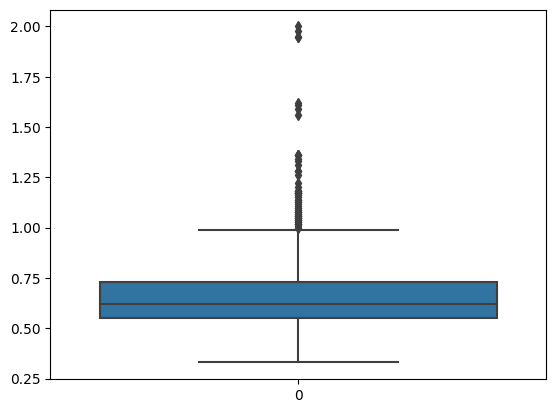

In [11]:
sns.boxplot(df.sulphates)

In [13]:
# Outlier removal by replacement with median
q1 = df.sulphates.quantile(0.25) #Q1
q3 = df.sulphates.quantile(0.75) #Q3

In [14]:
print(q1)
print(q3)
IQR = q3-q1

0.55
0.73


In [15]:
IQR

0.17999999999999994

In [16]:
upper_limit = q3+1.5*IQR
print(upper_limit)

0.9999999999999999


In [17]:
lower_limit =q1-1.5*IQR
print(lower_limit)

0.28000000000000014


In [18]:
df.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

<Axes: >

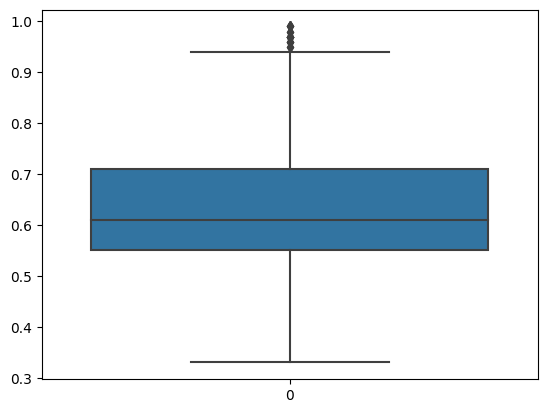

In [22]:
df['sulphates'] = np.where(df['sulphates']>upper_limit,0.62,df['sulphates'])
sns.boxplot(df.sulphates)

<Axes: >

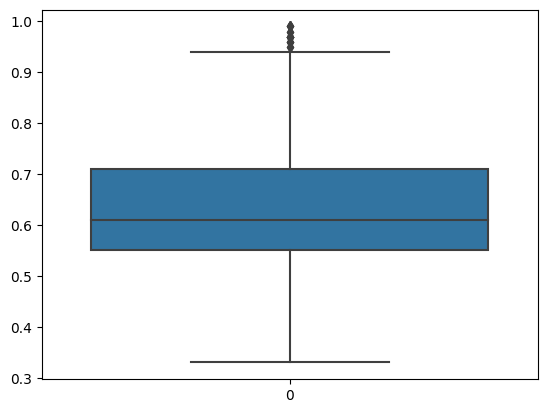

In [24]:
# .Outlier removal using IQR
sns.boxplot(df.sulphates)

In [25]:
q1 = df.sulphates.quantile(0.25) #Q1
q3 = df.sulphates.quantile(0.75) #Q3


0.9499999999999998


<Axes: >

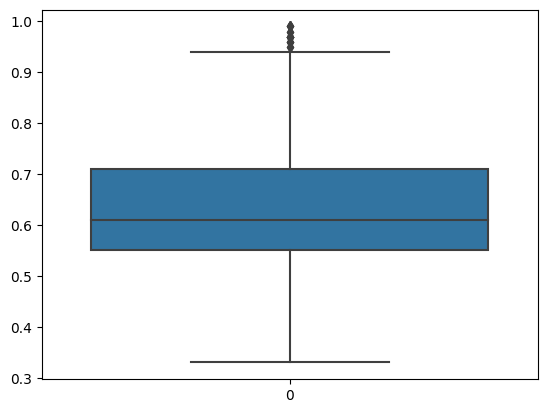

In [29]:
IQR =q3-q1
upper_limit = q3+1.5*IQR
print(upper_limit)
sns.boxplot(df.sulphates)

In [30]:
df.shape


(1599, 12)

In [32]:
#  Z-score
from scipy import stats
sulphates_zscore = stats.zscore(df.sulphates)
sulphates_zscore

0      -0.631544
1       0.377958
2       0.125583
3      -0.463294
4      -0.631544
          ...   
1594   -0.463294
1595    1.050960
1596    0.966835
1597    0.630334
1598    0.209708
Name: sulphates, Length: 1599, dtype: float64

<Axes: >

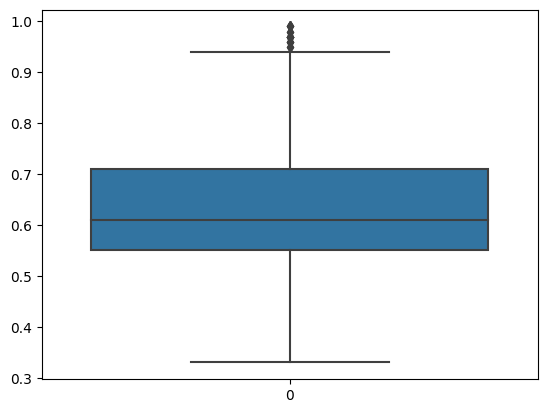

In [33]:
df_z = df[np.abs(sulphates_zscore)<=3]
sns.boxplot(df_z.sulphates)

In [34]:
df_z.shape


(1599, 12)

<Axes: >

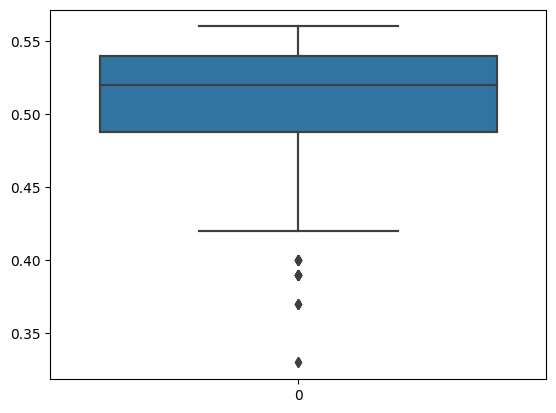

In [46]:
#3.Percentile
sns.boxplot(df.sulphates)
p99 = df.sulphates.quantile(0.99)
p99
df = df[df.sulphates<=p99]
sns.boxplot(df.sulphates)

In [47]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   

   alcohol  quality  
0      9.4        5  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7

In [50]:
# 1.Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.pH = le.fit_transform(df.pH)
df.density= le.fit_transform(df.density)

In [51]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   

   free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol  \
0                 11.0                  34.0      180  51       0.56      9.4   
4                 11.0                  34.0      180  51       0.56      9.4   
5                 13.0                  40.0      180  51       0.56      9.4   
6                 15.0                  59.0      129  30       0.46      9.4   
7                 15.0                  21.0       49  39       0.47     10.0   

   quality  
0        5  
4        5  
5        5  
6        5  
7        7

In [52]:
# 2.One-hot Encoding Method
df_main = pd.get_dummies(df,columns =['chlorides'])
df_main.head()


fixed acidity  volatile acidity  citric acid  residual sugar  \
0            7.4              0.70         0.00             1.9   
4            7.4              0.70         0.00             1.9   
5            7.4              0.66         0.00             1.8   
6            7.9              0.60         0.06             1.6   
7            7.3              0.65         0.00             1.2   

   free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol  \
0                 11.0                  34.0      180  51       0.56      9.4   
4                 11.0                  34.0      180  51       0.56      9.4   
5                 13.0                  40.0      180  51       0.56      9.4   
6                 15.0                  59.0      129  30       0.46      9.4   
7                 15.0                  21.0       49  39       0.47     10.0   

   ...  chlorides_0.118  chlorides_0.122  chlorides_0.123  \
0  ...                0                0                0   
4  ...                0                0                0   
5  ...                0                0                0   
6  ...                0                0                0   
7  ...                0                0                0   

   chlorides_0.1369999999999999  chlorides_0.166  chlorides_0.168  \
0                             0                0                0   
4                             0                0                0   
5                             0                0                0   
6                             0                0                0   
7                             0                0                0   

   chlorides_0.172  chlorides_0.186  chlorides_0.235  chlorides_0.267  
0                0                0                0                0  
4                0                0                0                0  
5                0                0                0                0  
6                0                0                0                0  
7                0                0                0                0  

[5 rows x 89 columns]

In [53]:
df_main.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity             1.000000         -0.142094     0.579584   
volatile acidity         -0.142094          1.000000    -0.537409   
citric acid               0.579584         -0.537409     1.000000   
residual sugar           -0.073521         -0.005113     0.108015   
free sulfur dioxide      -0.168299         -0.062603    -0.000710   
...                            ...               ...          ...   
chlorides_0.168          -0.016949          0.009713    -0.008264   
chlorides_0.172          -0.074695          0.121726    -0.030090   
chlorides_0.186          -0.016949          0.016571    -0.021906   
chlorides_0.235          -0.033933          0.007427     0.035388   
chlorides_0.267          -0.037330          0.049718    -0.054645   

                     residual sugar  free sulfur dioxide  \
fixed acidity             -0.073521            -0.168299   
volatile acidity          -0.005113            -0.062603   
citric acid                0.108015            -0.000710   
residual sugar             1.000000             0.304190   
free sulfur dioxide        0.304190             1.000000   
...                             ...                  ...   
chlorides_0.168            0.088935             0.147564   
chlorides_0.172           -0.032080            -0.035472   
chlorides_0.186           -0.028977            -0.043607   
chlorides_0.235            0.129274             0.204509   
chlorides_0.267           -0.041389             0.001136   

                     total sulfur dioxide   density        pH  sulphates  \
fixed acidity                   -0.040937  0.591270 -0.627217   0.030682   
volatile acidity                -0.063408  0.116728  0.297489  -0.107995   
citric acid                      0.192871  0.214591 -0.531223   0.095208   
residual sugar                   0.288075  0.226746  0.023780   0.058217   
free sulfur dioxide              0.718782  0.027331 -0.051832  -0.007104   
...                                   ...       ...       ...        ...   
chlorides_0.168                  0.056827  0.035651 -0.011094  -0.012111   
chlorides_0.172                 -0.035824 -0.066213  0.066906  -0.033802   
chlorides_0.186                 -0.033479 -0.012518  0.027906   0.031271   
chlorides_0.235                  0.076765  0.049075 -0.032367   0.052962   
chlorides_0.267                 -0.024096 -0.055158  0.003088  -0.001265   

                      alcohol  ...  chlorides_0.118  chlorides_0.122  \
fixed acidity       -0.207024  ...         0.115927        -0.062465   
volatile acidity    -0.151383  ...        -0.014910         0.044495   
citric acid          0.041823  ...         0.092893        -0.069635   
residual sugar       0.087354  ...         0.053921         0.235726   
free sulfur dioxide -0.149685  ...        -0.050765         0.301038   
...                       ...  ...              ...              ...   
chlorides_0.168     -0.031148  ...        -0.004189        -0.002956   
chlorides_0.172     -0.017169  ...        -0.004189        -0.002956   
chlorides_0.186     -0.031148  ...        -0.004189        -0.002956   
chlorides_0.235     -0.031148  ...        -0.004189        -0.002956   
chlorides_0.267     -0.017169  ...        -0.004189        -0.002956   

                     chlorides_0.123  chlorides_0.1369999999999999  \
fixed acidity               0.163552                     -0.010155   
volatile acidity           -0.076864                      0.224595   
citric acid                 0.177557                     -0.054645   
residual sugar             -0.005880                     -0.013462   
free sulfur dioxide        -0.073250                     -0.043607   
...                              ...                           ...   
chlorides_0.168            -0.002956                     -0.002088   
chlorides_0.172            -0.002956                     -0.002088   
chlorides_0.186            -0.002956                     -0.002

<Axes: >

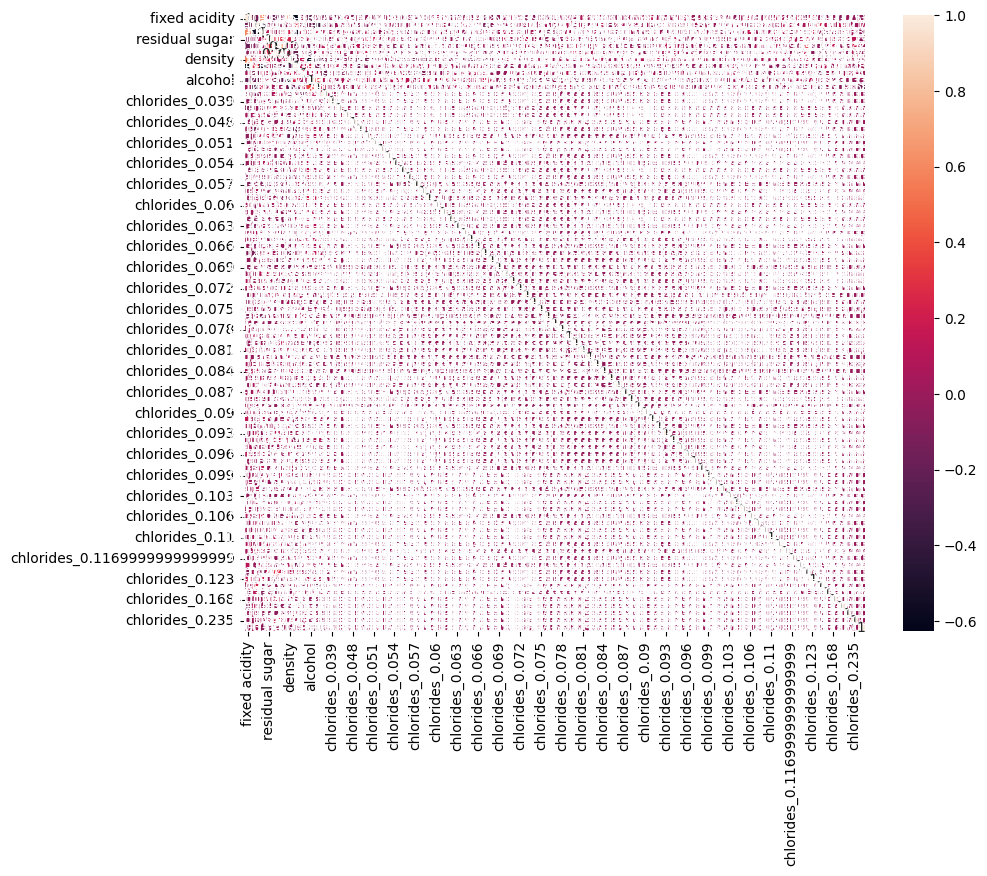

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [56]:
df_main.corr().sulphates.sort_values(ascending=False)

sulphates                       1.000000
quality                         0.168248
density                         0.145766
pH                              0.099029
chlorides_0.079                 0.098055
                                  ...   
chlorides_0.086                -0.101606
volatile acidity               -0.107995
chlorides_0.049                -0.109268
chlorides_0.1369999999999999   -0.120565
chlorides_0.012                -0.186037
Name: sulphates, Length: 89, dtype: float64

In [57]:
df_main.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
0            7.4              0.70         0.00             1.9   
4            7.4              0.70         0.00             1.9   
5            7.4              0.66         0.00             1.8   
6            7.9              0.60         0.06             1.6   
7            7.3              0.65         0.00             1.2   

   free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol  \
0                 11.0                  34.0      180  51       0.56      9.4   
4                 11.0                  34.0      180  51       0.56      9.4   
5                 13.0                  40.0      180  51       0.56      9.4   
6                 15.0                  59.0      129  30       0.46      9.4   
7                 15.0                  21.0       49  39       0.47     10.0   

   ...  chlorides_0.118  chlorides_0.122  chlorides_0.123  \
0  ...                0                0                0   
4  ...                0                0                0   
5  ...                0                0                0   
6  ...                0                0                0   
7  ...                0                0                0   

   chlorides_0.1369999999999999  chlorides_0.166  chlorides_0.168  \
0                             0                0                0   
4                             0                0                0   
5                             0                0                0   
6                             0                0                0   
7                             0                0                0   

   chlorides_0.172  chlorides_0.186  chlorides_0.235  chlorides_0.267  
0                0                0                0                0  
4                0                0                0                0  
5                0                0                0                0  
6                0                0                0                0  
7                0                0                0                0  

[5 rows x 89 columns]

In [58]:
# X and y split, independent variable and dependent varaible
y = df_main['sulphates']
y


0       0.56
4       0.56
5       0.56
6       0.46
7       0.47
        ... 
1572    0.51
1574    0.48
1582    0.50
1589    0.54
1591    0.56
Name: sulphates, Length: 480, dtype: float64

In [59]:
X =df_main.drop(columns =['sulphates'],axis =1)
X.head()


fixed acidity  volatile acidity  citric acid  residual sugar  \
0            7.4              0.70         0.00             1.9   
4            7.4              0.70         0.00             1.9   
5            7.4              0.66         0.00             1.8   
6            7.9              0.60         0.06             1.6   
7            7.3              0.65         0.00             1.2   

   free sulfur dioxide  total sulfur dioxide  density  pH  alcohol  quality  \
0                 11.0                  34.0      180  51      9.4        5   
4                 11.0                  34.0      180  51      9.4        5   
5                 13.0                  40.0      180  51      9.4        5   
6                 15.0                  59.0      129  30      9.4        5   
7                 15.0                  21.0       49  39     10.0        7   

   ...  chlorides_0.118  chlorides_0.122  chlorides_0.123  \
0  ...                0                0                0   
4  ...                0                0                0   
5  ...                0                0                0   
6  ...                0                0                0   
7  ...                0                0                0   

   chlorides_0.1369999999999999  chlorides_0.166  chlorides_0.168  \
0                             0                0                0   
4                             0                0                0   
5                             0                0                0   
6                             0                0                0   
7                             0                0                0   

   chlorides_0.172  chlorides_0.186  chlorides_0.235  chlorides_0.267  
0                0                0                0                0  
4                0                0                0                0  
5                0                0                0                0  
6                0                0                0                0  
7                0                0                0                0  

[5 rows x 88 columns]

In [60]:
# Scaling on independent variables
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
0       0.321839          0.380282     0.000000        0.076923   
1       0.321839          0.380282     0.000000        0.076923   
2       0.321839          0.352113     0.000000        0.069231   
3       0.379310          0.309859     0.076923        0.053846   
4       0.310345          0.345070     0.000000        0.023077   

   free sulfur dioxide  total sulfur dioxide   density        pH   alcohol  \
0             0.115942              0.095745  0.818182  0.784615  0.088889   
1             0.115942              0.095745  0.818182  0.784615  0.088889   
2             0.144928              0.117021  0.818182  0.784615  0.088889   
3             0.173913              0.184397  0.586364  0.461538  0.088889   
4             0.173913              0.049645  0.222727  0.600000  0.222222   

   quality  ...  chlorides_0.118  chlorides_0.122  chlorides_0.123  \
0      0.5  ...              0.0              0.0              0.0   
1      0.5  ...              0.0              0.0              0.0   
2      0.5  ...              0.0              0.0              0.0   
3      0.5  ...              0.0              0.0              0.0   
4      1.0  ...              0.0              0.0              0.0   

   chlorides_0.1369999999999999  chlorides_0.166  chlorides_0.168  \
0                           0.0              0.0              0.0   
1                           0.0              0.0              0.0   
2                           0.0              0.0              0.0   
3                           0.0              0.0              0.0   
4                           0.0              0.0              0.0   

   chlorides_0.172  chlorides_0.186  chlorides_0.235  chlorides_0.267  
0              0.0              0.0              0.0              0.0  
1              0.0              0.0              0.0              0.0  
2              0.0              0.0              0.0              0.0  
3              0.0              0.0              0.0              0.0  
4              0.0              0.0              0.0              0.0  

[5 rows x 88 columns]

In [61]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [62]:
X_train.shape
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  \
194       0.494253          0.503521     0.166667        0.196154   
430       0.287356          0.323944     0.076923        0.030769   
294       0.390805          0.014085     0.474359        0.000000   
76        0.367816          0.302817     0.423077        0.084615   
161       0.701149          0.190141     0.500000        0.100000   

     free sulfur dioxide  total sulfur dioxide   density        pH   alcohol  \
194             0.014493              0.024823  0.963636  0.676923  0.555556   
430             0.028986              0.017730  0.190909  0.261538  0.177778   
294             0.478261              0.361702  0.000000  0.015385  0.822222   
76              0.304348              0.400709  0.663636  0.384615  0.088889   
161             0.072464              0.088652  0.909091  0.015385  0.133333   

     quality  ...  chlorides_0.118  chlorides_0.122  chlorides_0.123  \
194     0.50  ...              0.0              0.0              0.0   
430     0.50  ...              0.0              0.0              0.0   
294     0.75  ...              0.0              0.0              0.0   
76      0.50  ...              0.0              0.0              0.0   
161     0.50  ...              0.0              0.0              0.0   

     chlorides_0.1369999999999999  chlorides_0.166  chlorides_0.168  \
194                           0.0              0.0              0.0   
430                           0.0              0.0              0.0   
294                           0.0              0.0              0.0   
76                            0.0              0.0              0.0   
161                           0.0              0.0              0.0   

     chlorides_0.172  chlorides_0.186  chlorides_0.235  chlorides_0.267  
194              0.0              0.0              0.0              0.0  
430              0.0              0.0              0.0              0.0  
294              0.0              0.0              0.0              0.0  
76               0.0              0.0              0.0              0.0  
161              0.0              0.0              0.0              0.0  

[5 rows x 88 columns]

In [63]:
y_train.shape
X_test.shape

(144, 88)

In [64]:
##Model BUILDING
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [67]:
r = Ridge()
l = Lasso()
r.fit(X_train,y_train)

Ridge()

In [69]:
l.fit(X_train,y_train)

Lasso()

In [71]:
pred1 =r.predict(X_test)

In [72]:
pred1

array([0.53102277, 0.52349246, 0.50911309, 0.49720001, 0.51788849,
       0.54763593, 0.49869252, 0.58451865, 0.48630059, 0.56419791,
       0.49820915, 0.52091125, 0.5571975 , 0.5046298 , 0.50691959,
       0.54829545, 0.48570122, 0.5167746 , 0.4578719 , 0.53161224,
       0.53178268, 0.48864277, 0.55901505, 0.53102277, 0.54099674,
       0.58093768, 0.52008984, 0.57942359, 0.49762366, 0.52112638,
       0.50869889, 0.49505031, 0.50438973, 0.47601691, 0.52453771,
       0.4970113 , 0.5206896 , 0.51867364, 0.5322481 , 0.50450952,
       0.53307266, 0.51435309, 0.52256863, 0.48879489, 0.49395515,
       0.48790827, 0.5124346 , 0.54387896, 0.48571573, 0.49203949,
       0.47662375, 0.53615079, 0.50004713, 0.52617878, 0.51316996,
       0.52617878, 0.48669305, 0.53158715, 0.56099494, 0.52212829,
       0.52644831, 0.5242345 , 0.49707149, 0.50136596, 0.50927974,
       0.51095359, 0.53029722, 0.49439927, 0.50380384, 0.4971646 ,
       0.48929006, 0.4884912 , 0.53057966, 0.54130052, 0.49432

In [73]:
pred1_train = r.predict(X_train)
pred1_train

array([0.52220829, 0.47583785, 0.47451539, 0.52251317, 0.50623992,
       0.54925739, 0.54812337, 0.48822478, 0.52256863, 0.49675435,
       0.49146107, 0.51762156, 0.49671127, 0.52906792, 0.46250952,
       0.52644136, 0.49448231, 0.54168413, 0.53457467, 0.51057096,
       0.53868878, 0.51638917, 0.50254189, 0.47131215, 0.54572066,
       0.49505031, 0.49950085, 0.50689494, 0.48493746, 0.52480779,
       0.53860722, 0.5102023 , 0.50232625, 0.49947044, 0.52376541,
       0.55543409, 0.50510257, 0.49967604, 0.52745952, 0.51204429,
       0.53055175, 0.51792961, 0.54573169, 0.51319013, 0.49361053,
       0.50733444, 0.50794548, 0.51242866, 0.5272364 , 0.48480986,
       0.50191876, 0.52000773, 0.53630207, 0.53389031, 0.4970113 ,
       0.50042453, 0.49374814, 0.48565161, 0.50748328, 0.54573169,
       0.53490286, 0.5460706 , 0.51638917, 0.52364798, 0.52413563,
       0.51484634, 0.47690671, 0.5368236 , 0.48563722, 0.48374602,
       0.54267294, 0.51939535, 0.56285625, 0.52256449, 0.49915

In [74]:
pred2 =l.predict(X_test)
pred2

array([0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065

In [75]:
pred2_train = l.predict(X_train)
pred2_train

array([0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065476,
       0.51065476, 0.51065476, 0.51065476, 0.51065476, 0.51065

In [76]:
profit =pd.DataFrame({'Actual_Profit':y_test, 'Ridge_pred':pred1,'Lasso_pred':pred2})
profit.head(10)


Actual_Profit  Ridge_pred  Lasso_pred
770            0.53    0.531023    0.510655
712            0.45    0.523492    0.510655
1485           0.55    0.509113    0.510655
1312           0.47    0.497200    0.510655
1052           0.55    0.517888    0.510655
609            0.52    0.547636    0.510655
1102           0.54    0.498693    0.510655
729            0.49    0.584519    0.510655
914            0.52    0.486301    0.510655
332            0.54    0.564198    0.510655

In [79]:
# Evaluating the model
# Evaluating Ridge and Lasso models

from sklearn import metrics
#r2 score
print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))


0.008128257071705614
-0.001916269192811626


In [80]:
# MSE
print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

0.0015070748760654521
0.0015223367819349977


In [82]:

# RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

0.038821062273789626
0.039017134465962486
